<center>
<h1> Linear Regression Case Study
</center>

Steps for Regression Modeling:
1. Business problem definition - One of the major automobile company would like to design new product which can improve the sales. Inorder to define the product, they want to understand Predicting sales of different car models and identify drivers for the sales(what are the factors driving sales). 
2. convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique -OLS
4. Data colletion(Y, X) 
5. Consolidate the data - aggregate and consolidate the data at customer level
6. Data preparation for modeling (create data audit report)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data  set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)


In [1]:
# importing Libaries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
# importing libraries
#from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [4]:
# importing data
car_sales = pd.read_csv('Car_sales.csv')

In [5]:
car_sales.shape

(157, 16)

In [6]:
car_sales.head()

Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0        2.639           13.2             28.0      2/2/2012   
1        3.517           17.2             25.0      6/3/2011   
2        3.470           17.2             26.0      1/4/2012   
3        3.850           18.0             22.0     3/10/2011   
4        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

In [7]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [8]:
car_sales.describe() # describe method give summary only continuous var

Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          157.000000           121.000000          155.000000   
mean            52.998076            18.072975           27.390755   
std             68.029422            11.453384           14.351653   
min              0.110000             5.160000            9.235000   
25%             14.114000            11.260000           18.017500   
50%             29.450000            14.180000           22.799000   
75%             67.956000            19.875000           31.947500   
max            540.561000            67.550000           85.500000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   156.000000  156.000000  156.000000  156.000000  156.000000   
mean      3.060897  185.948718  107.487179   71.150000  187.343590   
std       1.044653   56.700321    7.641303    3.451872   13.431754   
min       1.000000   55.000000   92.600000   62.600000  149.400000   
25%       2.300000  149.500000  103.000000   68.400000  177.575000   
50%       3.000000  177.500000  107.000000   70.550000  187.900000   
75%       3.575000  215.000000  112.200000   73.425000  196.125000   
max       8.000000  450.000000  138.700000   79.900000  224.500000   

       Curb_weight  Fuel_capacity  Fuel_efficiency  Power_perf_factor  
count   155.000000     156.000000       154.000000         155.000000  
mean      3.378026      17.951923        23.844156          77.043591  
std       0.630502       3.887921         4.282706          25.142664  
min       1.895000      10.300000        15.000000          23.276272  
25%       2.971000      15.800000        21.000000          60.407707  
50%       3.342000      17.200000        24.000000          72.030917  
75%       3.799500      19.575000        26.000000          89.414878  
max       5.572000      32.000000        45.000000         188.144323

In [9]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

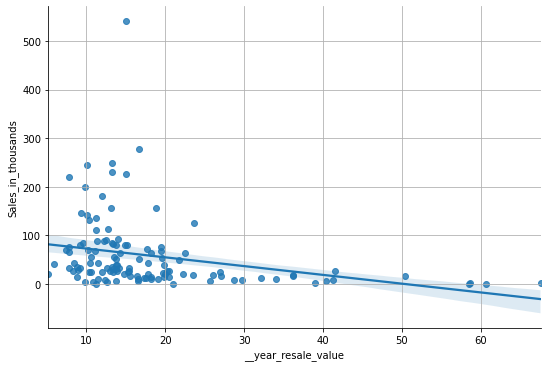

In [14]:
# Pandas scatter plot
# Relationship b/w every x wi
sns.lmplot( x='__year_resale_value', y='Sales_in_thousands',data = car_sales,aspect=1.5)

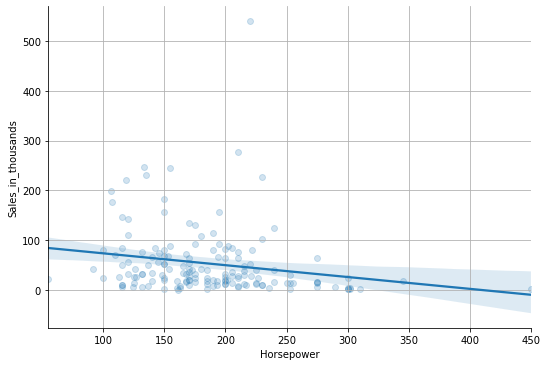

In [11]:
# Seaborn scatter plot with regression line
sns.lmplot(x='Horsepower', y='Sales_in_thousands', data=car_sales, aspect=1.5, scatter_kws={'alpha':0.2})

seperating out categorical and numerical var
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

In [50]:
#seperating out categorical and numerical var
numeric_var_names=[feature for feature in car_sales.columns if car_sales[feature].dtype!='O']
car_sales[numeric_var_names].head()


Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919               16.360               21.50          1.8   
1              39.384               19.875               28.40          3.2   
2              14.114               18.225                 NaN          3.2   
3               8.588               29.725               42.00          3.5   
4              20.397               22.255               23.99          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0       140.0      101.2   67.3   172.4        2.639           13.2   
1       225.0      108.1   70.3   192.9        3.517           17.2   
2       225.0      106.9   70.6   192.0        3.470           17.2   
3       210.0      114.6   71.4   196.6        3.850           18.0   
4       150.0      102.6   68.2   178.0        2.998           16.4   

   Fuel_efficiency  Power_perf_factor  
0             28.0          58.280150  
1             25.0          91.370778  
2             26.0                NaN  
3             22.0          91.389779  
4             27.0          62.777639

In [51]:
cat_var_names=[feature for feature in car_sales.columns if car_sales[feature].dtype!='float']
                                                                                      
car_sales[cat_var_names].head()

Manufacturer    Model Vehicle_type Latest_Launch
0        Acura  Integra    Passenger      2/2/2012
1        Acura       TL    Passenger      6/3/2011
2        Acura       CL    Passenger      1/4/2012
3        Acura       RL    Passenger     3/10/2011
4         Audi       A4    Passenger     10/8/2011

In [52]:
car_sales_num = car_sales[numeric_var_names]
car_sales_num.head(5)

Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919               16.360               21.50          1.8   
1              39.384               19.875               28.40          3.2   
2              14.114               18.225                 NaN          3.2   
3               8.588               29.725               42.00          3.5   
4              20.397               22.255               23.99          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
0       140.0      101.2   67.3   172.4        2.639           13.2   
1       225.0      108.1   70.3   192.9        3.517           17.2   
2       225.0      106.9   70.6   192.0        3.470           17.2   
3       210.0      114.6   71.4   196.6        3.850           18.0   
4       150.0      102.6   68.2   178.0        2.998           16.4   

   Fuel_efficiency  Power_perf_factor  
0             28.0          58.280150  
1             25.0          91.370778  
2             26.0                NaN  
3             22.0          91.389779  
4             27.0          62.777639

In [53]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

Manufacturer    Model Vehicle_type Latest_Launch
0        Acura  Integra    Passenger      2/2/2012
1        Acura       TL    Passenger      6/3/2011
2        Acura       CL    Passenger      1/4/2012
3        Acura       RL    Passenger     3/10/2011
4         Audi       A4    Passenger     10/8/2011

In [58]:
# Creating Data summary on numeric dataframe audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=car_sales_num.apply(lambda x: var_summary(x)).T

In [59]:
num_summary.to_csv('num_summary.csv')

In [56]:
num_summary

N  NMISS           SUM        MEAN      MEDIAN  \
Sales_in_thousands   157.0    0.0   8320.698000   52.998076   29.450000   
__year_resale_value  121.0   36.0   2186.830000   18.072975   14.180000   
Price_in_thousands   155.0    2.0   4245.567000   27.390755   22.799000   
Engine_size          156.0    1.0    477.500000    3.060897    3.000000   
Horsepower           156.0    1.0  29008.000000  185.948718  177.500000   
Wheelbase            156.0    1.0  16768.000000  107.487179  107.000000   
Width                156.0    1.0  11099.400000   71.150000   70.550000   
Length               156.0    1.0  29225.600000  187.343590  187.900000   
Curb_weight          155.0    2.0    523.594000    3.378026    3.342000   
Fuel_capacity        156.0    1.0   2800.500000   17.951923   17.200000   
Fuel_efficiency      154.0    3.0   3672.000000   23.844156   24.000000   
Power_perf_factor    155.0    2.0  11941.756636   77.043591   72.030917   

                           STD          VAR         MIN         P1  \
Sales_in_thousands   68.029422  4628.002257    0.110000    0.93728   
__year_resale_value  11.453384   131.180007    5.160000    6.17300   
Price_in_thousands   14.351653   205.969949    9.235000   10.23144   
Engine_size           1.044653     1.091300    1.000000    1.55500   
Horsepower           56.700321  3214.926385   55.000000   96.40000   
Wheelbase             7.641303    58.389512   92.600000   92.87500   
Width                 3.451872    11.915419   62.600000   66.08500   
Length               13.431754   180.412023  149.400000  154.91500   
Curb_weight           0.630502     0.397532    1.895000    2.24540   
Fuel_capacity         3.887921    15.115932   10.300000   11.90000   
Fuel_efficiency       4.282706    18.341567   15.000000   15.00000   
Power_perf_factor    25.142664   632.153558   23.276272   38.46192   

                             P5         P10         P25         P50  \
Sales_in_thousands     1.870800    5.453600   14.114000   29.450000   
__year_resale_value    7.850000    9.125000   11.260000   14.180000   
Price_in_thousands    12.469000   13.970800   18.017500   22.799000   
Engine_size            1.800000    1.950000    2.300000    3.000000   
Horsepower           114.500000  120.000000  149.500000  177.500000   
Wheelbase             95.875000   98.650000  103.000000  107.000000   
Width                 66.500000   66.900000   68.400000   70.550000   
Length               163.675000  173.000000  177.575000  187.900000   
Curb_weight            2.423500    2.606200    2.971000    3.342000   
Fuel_capacity         12.500000   13.200000   15.800000   17.200000   
Fuel_efficiency       16.650000   18.300000   21.000000   24.000000   
Power_perf_factor     46.203997   48.447741   60.407707   72.030917   

                            P75         P90         P95         P99  \
Sales_in_thousands    67.956000  127.641600  185.336200  260.645320   
__year_resale_value   19.875000   32.075000   41.250000   60.220000   
Price_in_thousands    31.947500   44.017000   55.835000   78.479800   
Engine_size            3.575000    4.600000    4.775000    5.700000   
Horsepower           215.000000  254.000000  300.000000  325.750000   
Wheelbase            112.200000  115.500000  119.250000  134.375000   
Width                 73.425000   76.200000   78.200000   79.190000   
Length               196.125000  203.400000  208.500000  219.305000   
Curb_weight            3.799500    4.118600    4.389100    5.396680   
Fuel_capacity         19.575000   23.200000   25.400000   30.900000   
Fuel_efficiency       26.000000   28.700000   31.000000   33.000000   
Power_perf_factor     89.414878  108.499252  125.091513  141.119461   

                            MAX  
Sales_in_thousands   540.561000  
__year_resale_value   67.550000  
Price_in_thousands    85.500000  
Engine_size            8.000000  
Horsepower           450.000000  
Wheelbase            138.700000  
Width                 79.900000  
Length            

In [60]:
car_sales_cat=car_sales.select_dtypes(include=['object'])

In [61]:
car_sales_cat.head(5)

Manufacturer    Model Vehicle_type Latest_Launch
0        Acura  Integra    Passenger      2/2/2012
1        Acura       TL    Passenger      6/3/2011
2        Acura       CL    Passenger      1/4/2012
3        Acura       RL    Passenger     3/10/2011
4         Audi       A4    Passenger     10/8/2011

In [62]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=car_sales_cat.apply(lambda x: cat_summary(x))

In [63]:
cat_summary

Manufacturer  \
N                                                           157   
NMISS                                                         0   
ColumnsNames  Ford          11
Dodge         11
Chevrolet   ...   

                                                          Model  \
N                                                           157   
NMISS                                                         0   
ColumnsNames  Neon        2
LS400       1
Viper       1
Maxi...   

                                                   Vehicle_type  \
N                                                           157   
NMISS                                                         0   
ColumnsNames  Passenger    116
Car           41
Name: Vehicl...   

                                                  Latest_Launch  
N                                                           157  
NMISS                                                         0  
ColumnsNames  7/22/2012     2
11/24/2012    2
2/18/2011     ...

In [64]:
#Detailed profiling using pandas profiling
pandas_profiling.ProfileReport(car_sales)

In [65]:
#Handling Outliers - Method1
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip(upper=car_sales['Sales_in_thousands'].quantile(0.99)) 
car_sales['Sales_in_thousands']= car_sales['Sales_in_thousands'].clip(lower=car_sales['Sales_in_thousands'].quantile(0.01)) 


In [66]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM        MEAN      MEDIAN  \
Sales_in_thousands   157.0    0.0   8320.698000   52.998076   29.450000   
__year_resale_value  121.0   36.0   2186.830000   18.072975   14.180000   
Price_in_thousands   155.0    2.0   4245.567000   27.390755   22.799000   
Engine_size          156.0    1.0    477.500000    3.060897    3.000000   
Horsepower           156.0    1.0  29008.000000  185.948718  177.500000   
Wheelbase            156.0    1.0  16768.000000  107.487179  107.000000   
Width                156.0    1.0  11099.400000   71.150000   70.550000   
Length               156.0    1.0  29225.600000  187.343590  187.900000   
Curb_weight          155.0    2.0    523.594000    3.378026    3.342000   
Fuel_capacity        156.0    1.0   2800.500000   17.951923   17.200000   
Fuel_efficiency      154.0    3.0   3672.000000   23.844156   24.000000   
Power_perf_factor    155.0    2.0  11941.756636   77.043591   72.030917   

                           STD          VAR         MIN         P1  \
Sales_in_thousands   68.029422  4628.002257    0.110000    0.93728   
__year_resale_value  11.453384   131.180007    5.160000    6.17300   
Price_in_thousands   14.351653   205.969949    9.235000   10.23144   
Engine_size           1.044653     1.091300    1.000000    1.55500   
Horsepower           56.700321  3214.926385   55.000000   96.40000   
Wheelbase             7.641303    58.389512   92.600000   92.87500   
Width                 3.451872    11.915419   62.600000   66.08500   
Length               13.431754   180.412023  149.400000  154.91500   
Curb_weight           0.630502     0.397532    1.895000    2.24540   
Fuel_capacity         3.887921    15.115932   10.300000   11.90000   
Fuel_efficiency       4.282706    18.341567   15.000000   15.00000   
Power_perf_factor    25.142664   632.153558   23.276272   38.46192   

                             P5         P10         P25         P50  \
Sales_in_thousands     1.870800    5.453600   14.114000   29.450000   
__year_resale_value    7.850000    9.125000   11.260000   14.180000   
Price_in_thousands    12.469000   13.970800   18.017500   22.799000   
Engine_size            1.800000    1.950000    2.300000    3.000000   
Horsepower           114.500000  120.000000  149.500000  177.500000   
Wheelbase             95.875000   98.650000  103.000000  107.000000   
Width                 66.500000   66.900000   68.400000   70.550000   
Length               163.675000  173.000000  177.575000  187.900000   
Curb_weight            2.423500    2.606200    2.971000    3.342000   
Fuel_capacity         12.500000   13.200000   15.800000   17.200000   
Fuel_efficiency       16.650000   18.300000   21.000000   24.000000   
Power_perf_factor     46.203997   48.447741   60.407707   72.030917   

                            P75         P90         P95         P99  \
Sales_in_thousands    67.956000  127.641600  185.336200  260.645320   
__year_resale_value   19.875000   32.075000   41.250000   60.220000   
Price_in_thousands    31.947500   44.017000   55.835000   78.479800   
Engine_size            3.575000    4.600000    4.775000    5.700000   
Horsepower           215.000000  254.000000  300.000000  325.750000   
Wheelbase            112.200000  115.500000  119.250000  134.375000   
Width                 73.425000   76.200000   78.200000   79.190000   
Length               196.125000  203.400000  208.500000  219.305000   
Curb_weight            3.799500    4.118600    4.389100    5.396680   
Fuel_capacity         19.575000   23.200000   25.400000   30.900000   
Fuel_efficiency       26.000000   28.700000   31.000000   33.000000   
Power_perf_factor     89.414878  108.499252  125.091513  141.119461   

                            MAX  
Sales_in_thousands   540.561000  
__year_resale_value   67.550000  
Price_in_thousands    85.500000  
Engine_size            8.000000  
Horsepower           450.000000  
Wheelbase            138.700000  
Width                 79.900000  
Length            

In [67]:
car_sales.clip()

Manufacturer    Model  Sales_in_thousands  __year_resale_value  \
0          Acura  Integra              16.919               16.360   
1          Acura       TL              39.384               19.875   
2          Acura       CL              14.114               18.225   
3          Acura       RL               8.588               29.725   
4           Audi       A4              20.397               22.255   
..           ...      ...                 ...                  ...   
152        Volvo      V40               3.545                  NaN   
153        Volvo      S70              15.245                  NaN   
154        Volvo      V70              17.531                  NaN   
155        Volvo      C70               3.493                  NaN   
156        Volvo      S80              18.969                  NaN   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger               21.50          1.8       140.0      101.2   
1      Passenger               28.40          3.2       225.0      108.1   
2      Passenger                 NaN          3.2       225.0      106.9   
3      Passenger               42.00          3.5       210.0      114.6   
4      Passenger               23.99          1.8       150.0      102.6   
..           ...                 ...          ...         ...        ...   
152    Passenger               24.40          1.9       160.0      100.5   
153    Passenger               27.50          2.4       168.0      104.9   
154    Passenger               28.80          2.4       168.0      104.9   
155    Passenger               45.50          2.3       236.0      104.9   
156    Passenger               36.00          2.9       201.0      109.9   

     Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0     67.3   172.4        2.639           13.2             28.0      2/2/2012   
1     70.3   192.9        3.517           17.2             25.0      6/3/2011   
2     70.6   192.0        3.470           17.2             26.0      1/4/2012   
3     71.4   196.6        3.850           18.0             22.0     3/10/2011   
4     68.2   178.0        2.998           16.4             27.0     10/8/2011   
..     ...     ...          ...            ...              ...           ...   
152   67.6   176.6        3.042           15.8             25.0     9/21/2011   
153   69.3   185.9        3.208           17.9             25.0    11/24/2012   
154   69.3   186.2        3.259           17.9             25.0     6/25/2011   
155   71.5   185.7        3.601           18.5             23.0     4/26/2011   
156   72.1   189.8        3.600           21.1             24.0    11/14/2011   

     Power_perf_factor  
0            58.280150  
1            91.370778  
2                  NaN  
3            91.389779  
4            62.777639  
..                 ...  
152          66.498812  
153          70.654495  
154          71.155978  
155         101.623357  
156          85.735655  

[157 rows x 16 columns]

In [68]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

car_sales_num=car_sales_num.apply(lambda x: outlier_capping(x))

In [69]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM        MEAN      MEDIAN  \
Sales_in_thousands   157.0    0.0   8025.529200   51.118020   29.450000   
__year_resale_value  121.0   36.0   2180.421000   18.020008   14.180000   
Price_in_thousands   155.0    2.0   4235.955480   27.328745   22.799000   
Engine_size          156.0    1.0    475.810000    3.050064    3.000000   
Horsepower           156.0    1.0  28910.300000  185.322436  177.500000   
Wheelbase            156.0    1.0  16760.100000  107.436538  107.000000   
Width                156.0    1.0  11102.450000   71.169551   70.550000   
Length               156.0    1.0  29223.940000  187.332949  187.900000   
Curb_weight          155.0    2.0    523.770160    3.379162    3.342000   
Fuel_capacity        156.0    1.0   2799.900000   17.948077   17.200000   
Fuel_efficiency      154.0    3.0   3660.000000   23.766234   24.000000   
Power_perf_factor    155.0    2.0  11911.685368   76.849583   72.030917   

                           STD          VAR        MIN          P1  \
Sales_in_thousands   57.722699  3331.909938    0.93728    0.946643   
__year_resale_value  11.181335   125.022260    6.17300    6.423400   
Price_in_thousands   14.063970   197.795238   10.23144   10.476362   
Engine_size           0.982279     0.964871    1.55500    1.579750   
Horsepower           52.816470  2789.579526   96.40000   98.380000   
Wheelbase             7.424295    55.120156   92.87500   92.998750   
Width                 3.390339    11.494400   66.08500   66.258250   
Length               13.120350   172.143594  154.91500  156.226750   
Curb_weight           0.621764     0.386591    2.24540    2.247884   
Fuel_capacity         3.819854    14.591287   11.90000   11.900000   
Fuel_efficiency       3.994755    15.958068   15.00000   15.000000   
Power_perf_factor    23.844968   568.582480   38.46192   39.285152   

                             P5         P10         P25         P50  \
Sales_in_thousands     1.870800    5.453600   14.114000   29.450000   
__year_resale_value    7.850000    9.125000   11.260000   14.180000   
Price_in_thousands    12.469000   13.970800   18.017500   22.799000   
Engine_size            1.800000    1.950000    2.300000    3.000000   
Horsepower           114.500000  120.000000  149.500000  177.500000   
Wheelbase             95.875000   98.650000  103.000000  107.000000   
Width                 66.500000   66.900000   68.400000   70.550000   
Length               163.675000  173.000000  177.575000  187.900000   
Curb_weight            2.423500    2.606200    2.971000    3.342000   
Fuel_capacity         12.500000   13.200000   15.800000   17.200000   
Fuel_efficiency       16.650000   18.300000   21.000000   24.000000   
Power_perf_factor     46.203997   48.447741   60.407707   72.030917   

                            P75         P90         P95         P99  \
Sales_in_thousands    67.956000  127.641600  185.336200  253.560581   
__year_resale_value   19.875000   32.075000   41.250000   59.896000   
Price_in_thousands    31.947500   44.017000   55.835000   76.584508   
Engine_size            3.575000    4.600000    4.775000    5.700000   
Horsepower           215.000000  254.000000  300.000000  317.087500   
Wheelbase            112.200000  115.500000  119.250000  132.518750   
Width                 73.425000   76.200000   78.200000   79.140500   
Length               196.125000  203.400000  208.500000  217.102250   
Curb_weight            3.799500    4.118600    4.389100    5.394693   
Fuel_capacity         19.575000   23.200000   25.400000   30.405000   
Fuel_efficiency       26.000000   28.700000   31.000000   33.000000   
Power_perf_factor     89.414878  108.499252  125.091513  141.109484   

                            MAX  
Sales_in_thousands   260.645320  
__year_resale_value   60.220000  
Price_in_thousands    78.479800  
Engine_size            5.700000  
Horsepower           325.750000  
Wheelbase            134.375000  
Width                 79.190000  
Length            

In [70]:
# Detect the missing value
car_sales.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [71]:
#Handling Missings
# Fill with mean
car_sales['__year_resale_value']=car_sales['__year_resale_value'].fillna(car_sales['__year_resale_value'].mean())

In [72]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM        MEAN      MEDIAN  \
Sales_in_thousands   157.0    0.0   8025.529200   51.118020   29.450000   
__year_resale_value  121.0   36.0   2180.421000   18.020008   14.180000   
Price_in_thousands   155.0    2.0   4235.955480   27.328745   22.799000   
Engine_size          156.0    1.0    475.810000    3.050064    3.000000   
Horsepower           156.0    1.0  28910.300000  185.322436  177.500000   
Wheelbase            156.0    1.0  16760.100000  107.436538  107.000000   
Width                156.0    1.0  11102.450000   71.169551   70.550000   
Length               156.0    1.0  29223.940000  187.332949  187.900000   
Curb_weight          155.0    2.0    523.770160    3.379162    3.342000   
Fuel_capacity        156.0    1.0   2799.900000   17.948077   17.200000   
Fuel_efficiency      154.0    3.0   3660.000000   23.766234   24.000000   
Power_perf_factor    155.0    2.0  11911.685368   76.849583   72.030917   

                           STD          VAR        MIN          P1  \
Sales_in_thousands   57.722699  3331.909938    0.93728    0.946643   
__year_resale_value  11.181335   125.022260    6.17300    6.423400   
Price_in_thousands   14.063970   197.795238   10.23144   10.476362   
Engine_size           0.982279     0.964871    1.55500    1.579750   
Horsepower           52.816470  2789.579526   96.40000   98.380000   
Wheelbase             7.424295    55.120156   92.87500   92.998750   
Width                 3.390339    11.494400   66.08500   66.258250   
Length               13.120350   172.143594  154.91500  156.226750   
Curb_weight           0.621764     0.386591    2.24540    2.247884   
Fuel_capacity         3.819854    14.591287   11.90000   11.900000   
Fuel_efficiency       3.994755    15.958068   15.00000   15.000000   
Power_perf_factor    23.844968   568.582480   38.46192   39.285152   

                             P5         P10         P25         P50  \
Sales_in_thousands     1.870800    5.453600   14.114000   29.450000   
__year_resale_value    7.850000    9.125000   11.260000   14.180000   
Price_in_thousands    12.469000   13.970800   18.017500   22.799000   
Engine_size            1.800000    1.950000    2.300000    3.000000   
Horsepower           114.500000  120.000000  149.500000  177.500000   
Wheelbase             95.875000   98.650000  103.000000  107.000000   
Width                 66.500000   66.900000   68.400000   70.550000   
Length               163.675000  173.000000  177.575000  187.900000   
Curb_weight            2.423500    2.606200    2.971000    3.342000   
Fuel_capacity         12.500000   13.200000   15.800000   17.200000   
Fuel_efficiency       16.650000   18.300000   21.000000   24.000000   
Power_perf_factor     46.203997   48.447741   60.407707   72.030917   

                            P75         P90         P95         P99  \
Sales_in_thousands    67.956000  127.641600  185.336200  253.560581   
__year_resale_value   19.875000   32.075000   41.250000   59.896000   
Price_in_thousands    31.947500   44.017000   55.835000   76.584508   
Engine_size            3.575000    4.600000    4.775000    5.700000   
Horsepower           215.000000  254.000000  300.000000  317.087500   
Wheelbase            112.200000  115.500000  119.250000  132.518750   
Width                 73.425000   76.200000   78.200000   79.140500   
Length               196.125000  203.400000  208.500000  217.102250   
Curb_weight            3.799500    4.118600    4.389100    5.394693   
Fuel_capacity         19.575000   23.200000   25.400000   30.405000   
Fuel_efficiency       26.000000   28.700000   31.000000   33.000000   
Power_perf_factor     89.414878  108.499252  125.091513  141.109484   

                            MAX  
Sales_in_thousands   260.645320  
__year_resale_value   60.220000  
Price_in_thousands    78.479800  
Engine_size            5.700000  
Horsepower           325.750000  
Wheelbase            134.375000  
Width                 79.190000  
Length            

In [73]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [74]:
num_summary=car_sales_num.apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM        MEAN      MEDIAN  \
Sales_in_thousands   157.0    0.0   8025.529200   51.118020   29.450000   
__year_resale_value  157.0    0.0   2829.141298   18.020008   17.710000   
Price_in_thousands   157.0    0.0   4290.612970   27.328745   23.400000   
Engine_size          157.0    0.0    478.860064    3.050064    3.000000   
Horsepower           157.0    0.0  29095.622436  185.322436  180.000000   
Wheelbase            157.0    0.0  16867.536538  107.436538  107.000000   
Width                157.0    0.0  11173.619551   71.169551   70.600000   
Length               157.0    0.0  29411.272949  187.332949  187.800000   
Curb_weight          157.0    0.0    530.528485    3.379162    3.368000   
Fuel_capacity        157.0    0.0   2817.848077   17.948077   17.200000   
Fuel_efficiency      157.0    0.0   3731.298701   23.766234   24.000000   
Power_perf_factor    157.0    0.0  12065.384534   76.849583   72.290355   

                           STD          VAR        MIN          P1  \
Sales_in_thousands   57.722699  3331.909938    0.93728    0.946643   
__year_resale_value   9.806680    96.170969    6.17300    6.874120   
Price_in_thousands   13.973525   195.259402   10.23144   10.485434   
Engine_size           0.979125     0.958686    1.55500    1.580200   
Horsepower           52.646914  2771.697606   96.40000   98.416000   
Wheelbase             7.400461    54.766822   92.87500   93.001000   
Width                 3.379455    11.420718   66.08500   66.261400   
Length               13.078230   171.040110  154.91500  156.250600   
Curb_weight           0.617766     0.381634    2.24540    2.247976   
Fuel_capacity         3.807591    14.497753   11.90000   11.900000   
Fuel_efficiency       3.956157    15.651182   15.00000   15.000000   
Power_perf_factor    23.691622   561.292961   38.46192   39.315643   

                             P5         P10         P25         P50  \
Sales_in_thousands     1.870800    5.453600   14.114000   29.450000   
__year_resale_value    8.425000    9.710000   12.545000   17.710000   
Price_in_thousands    12.491000   13.976200   18.145000   23.400000   
Engine_size            1.800000    1.960000    2.300000    3.000000   
Horsepower           114.600000  120.000000  150.000000  180.000000   
Wheelbase             95.920000   98.700000  103.000000  107.000000   
Width                 66.500000   66.900000   68.400000   70.600000   
Length               163.700000  173.120000  177.600000  187.800000   
Curb_weight            2.424000    2.612800    2.975000    3.368000   
Fuel_capacity         12.500000   13.200000   15.800000   17.200000   
Fuel_efficiency       16.800000   18.600000   21.000000   24.000000   
Power_perf_factor     46.257114   48.522793   60.727447   72.290355   

                            P75        P90         P95         P99         MAX  
Sales_in_thousands    67.956000  127.64160  185.336200  253.560581  260.645320  
__year_resale_value   18.140000   27.02500   39.275000   59.312800   60.220000  
Price_in_thousands    31.930000   43.78800   55.225000   76.514312   78.479800  
Engine_size            3.500000    4.60000    4.760000    5.700000    5.700000  
Horsepower           215.000000  253.80000  300.000000  316.930000  325.750000  
Wheelbase            112.200000  115.46000  119.200000  132.485000  134.375000  
Width                 73.400000   76.18000   78.200000   79.139600   79.190000  
Length               196.100000  203.34000  208.500000  217.062200  219.305000  
Curb_weight            3.778000    4.11740    4.388400    5.394619    5.396680  
Fuel_capacity         19.500000   23.20000   25.400000   30.396000   30.900000  
Fuel_efficiency       26.000000   28.40000   31.000000   33.000000   33.000000  
Power_perf_factor     89.401935  107.99432  125.065461  141.109114  141.119461

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [75]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  157 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [76]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')


In [77]:
car_sales['Vehicle_type'].value_counts()

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [78]:
col_dummies[18:34]

Vehicle_type_Car  Vehicle_type_Passenger
18                 1                       0
19                 0                       1
20                 0                       1
21                 0                       1
22                 0                       1
23                 0                       1
24                 0                       1
25                 0                       1
26                 0                       1
27                 0                       1
28                 0                       1
29                 0                       1
30                 0                       1
31                 0                       1
32                 0                       1
33                 1                       0

In [79]:
col_dummies=pd.get_dummies(car_sales['Vehicle_type'], prefix='Vehicle_type')
col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
car_sales_cat = pd.concat([car_sales['Vehicle_type'], col_dummies], axis=1)
car_sales_cat.drop( 'Vehicle_type', axis = 1, inplace = True )

In [80]:
car_sales_cat.head(5)

Vehicle_type_Passenger
0                       1
1                       1
2                       1
3                       1
4                       1

In [81]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [82]:
car_sales_cat.head()

Vehicle_type_Passenger
0                       1
1                       1
2                       1
3                       1
4                       1

In [83]:
#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

<ipython-input-83-cd95e50a2e4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')


In [84]:
car_sales_cat.head(5)

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
0                  0                 0                   0   
1                  0                 0                   0   
2                  0                 0                   0   
3                  0                 0                   0   
4                  1                 0                   0   

   Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
0                      0                       0                      0   
1                      0                       0                      0   
2                      0                       0                      0   
3                      0                       0                      0   
4                      0                       0                      0   

   Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   
3                   0                  0                   0   
4                   0                  0                   0   

   Manufacturer_Hyundai  ...  Manufacturer_Plymouth  Manufacturer_Pontiac  \
0                     0  ...                      0                     0   
1                     0  ...                      0                     0   
2                     0  ...                      0                     0   
3                     0  ...                      0                     0   
4                     0  ...                      0                     0   

   Manufacturer_Porsche  Manufacturer_Saab  Manufacturer_Saturn  \
0                     0                  0                    0   
1                     0                  0                    0   
2                     0                  0                    0   
3                     0                  0                    0   
4                     0                  0                    0   

   Manufacturer_Subaru  Manufacturer_Toyota  Manufacturer_Volkswagen  \
0                    0                    0                        0   
1                    0                    0                        0   
2                    0                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   

   Manufacturer_Volvo  Vehicle_type_Passenger  
0                   0                       1  
1                   0                       1  
2                   0                       1  
3                   0                       1  
4                   0                       1  

[5 rows x 30 columns]

In [85]:

#car_sales=pd.concat(car_sales_num, car_sales_cat)
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

In [86]:
car_sales_new.head(5)

Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919               16.360           21.500000          1.8   
1              39.384               19.875           28.400000          3.2   
2              14.114               18.225           27.328745          3.2   
3               8.588               29.725           42.000000          3.5   
4              20.397               22.255           23.990000          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  ...  \
0       140.0      101.2   67.3   172.4        2.639           13.2  ...   
1       225.0      108.1   70.3   192.9        3.517           17.2  ...   
2       225.0      106.9   70.6   192.0        3.470           17.2  ...   
3       210.0      114.6   71.4   196.6        3.850           18.0  ...   
4       150.0      102.6   68.2   178.0        2.998           16.4  ...   

   Manufacturer_Plymouth  Manufacturer_Pontiac  Manufacturer_Porsche  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   Manufacturer_Saab  Manufacturer_Saturn  Manufacturer_Subaru  \
0                  0                    0                    0   
1                  0                    0                    0   
2                  0                    0                    0   
3                  0                    0                    0   
4                  0                    0                    0   

   Manufacturer_Toyota  Manufacturer_Volkswagen  Manufacturer_Volvo  \
0                    0                        0                   0   
1                    0                        0                   0   
2                    0                        0                   0   
3                    0                        0                   0   
4                    0                        0                   0   

   Vehicle_type_Passenger  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  

[5 rows x 42 columns]

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

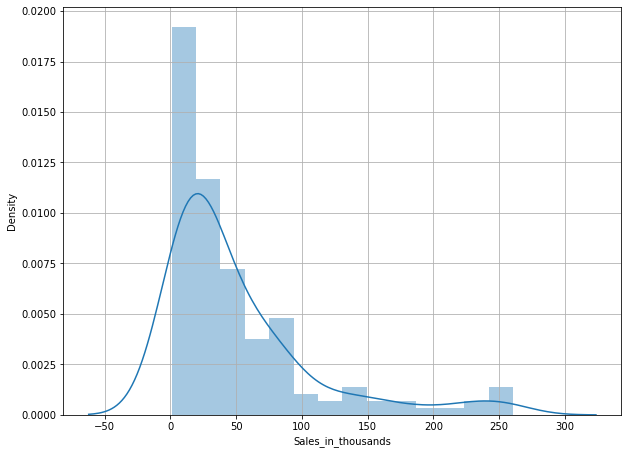

In [87]:
# exploring data
# Distribution of variables
# Y is normally distributed or Not
import seaborn as sns
sns.distplot(car_sales_new.Sales_in_thousands)

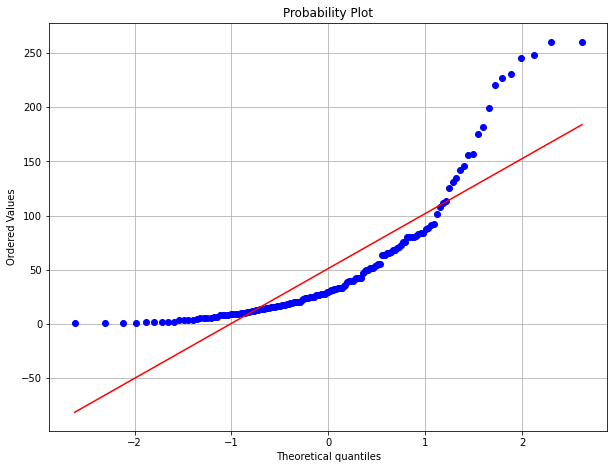

In [88]:
# Q-Q Plot
from scipy import stats
import pylab

stats.probplot( car_sales_new.Sales_in_thousands, dist="norm", plot=pylab )
pylab.show()

In [89]:
# converting Y to log(Y)
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"]+1)

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ln_sales_in_thousands', ylabel='Density'>

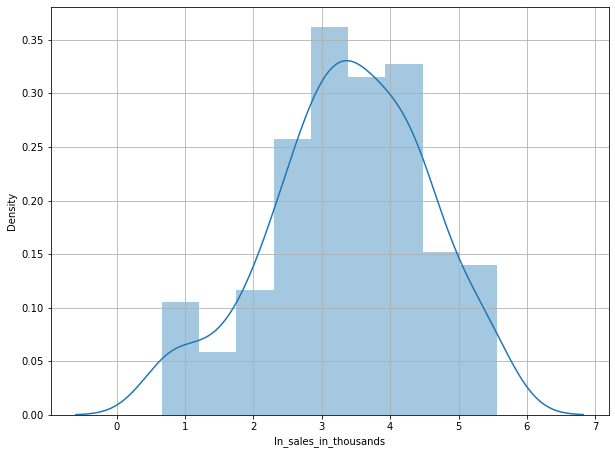

In [90]:
sns.distplot(car_sales_new.ln_sales_in_thousands)

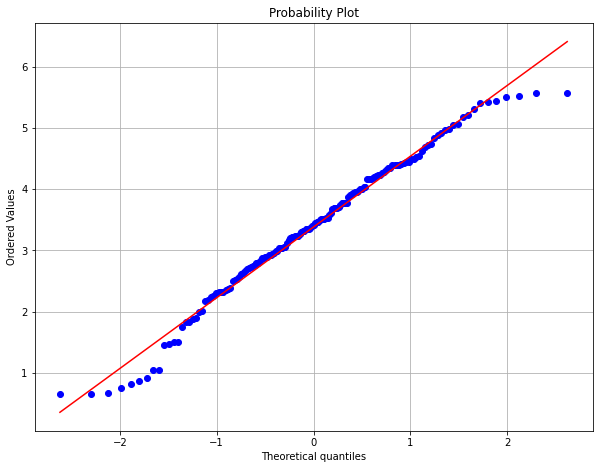

In [91]:
# Q-Q Plot
from scipy import stats
import pylab

stats.probplot( car_sales_new.ln_sales_in_thousands, dist="norm", plot=pylab )
pylab.show()

In [92]:
#Dropping the Y variables
car_sales_new=car_sales_new.drop(['Sales_in_thousands'],axis=1)

In [93]:
car_sales_new.columns

Index(['__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sale

In [94]:
# Correlation matrix of car_sales_new
car_sales_new.corr()

__year_resale_value  Price_in_thousands  Engine_size  \
__year_resale_value             1.000000e+00            0.832320     0.440258   
Price_in_thousands              8.323203e-01            1.000000     0.618230   
Engine_size                     4.402582e-01            0.618230     1.000000   
Horsepower                      6.796053e-01            0.849851     0.815010   
Wheelbase                      -3.762379e-02            0.118080     0.518423   
Width                           1.582115e-01            0.328107     0.702618   
Length                          2.551744e-02            0.158161     0.576386   
Curb_weight                     3.043781e-01            0.527230     0.793937   
Fuel_capacity                   2.842737e-01            0.430942     0.698341   
Fuel_efficiency                -3.643418e-01           -0.505995    -0.757170   
Power_perf_factor               7.305955e-01            0.906767     0.796880   
Manufacturer_Audi               1.463488e-01            0.126770    -0.016693   
Manufacturer_BMW                1.368779e-01            0.057796    -0.050061   
Manufacturer_Buick             -5.092434e-02           -0.006355     0.095247   
Manufacturer_Cadillac           7.976190e-02            0.168300     0.269440   
Manufacturer_Chevrolet         -1.045554e-01           -0.127385     0.016968   
Manufacturer_Chrysler          -5.793061e-02           -0.051817    -0.050603   
Manufacturer_Dodge             -2.985356e-02           -0.061387     0.126538   
Manufacturer_Ford              -1.291647e-01           -0.123784     0.077961   
Manufacturer_Honda             -4.569773e-02           -0.091821    -0.098501   
Manufacturer_Hyundai           -1.482623e-01           -0.150161    -0.152309   
Manufacturer_Infiniti           1.367784e-02            0.012279    -0.004107   
Manufacturer_Jaguar             2.273283e-17            0.088929    -0.004107   
Manufacturer_Jeep              -3.807465e-02           -0.063500     0.064343   
Manufacturer_Lexus              1.541779e-01            0.239369     0.115722   
Manufacturer_Lincoln            2.955527e-02            0.143904     0.259782   
Manufacturer_Mercedes-B         2.926126e-01            0.431095     0.094030   
Manufacturer_Mercury           -8.258641e-02           -0.094172     0.020411   
Manufacturer_Mitsubishi        -8.304436e-02           -0.080047    -0.055348   
Manufacturer_Nissan            -6.957982e-02           -0.077049    -0.030053   
Manufacturer_Oldsmobile        -1.966108e-02           -0.024413     0.081682   
Manufacturer_Plymouth          -1.012489e-01           -0.054399    -0.095269   
Manufacturer_Pontiac           -7.130299e-02           -0.062676     0.078278   
Manufacturer_Porsche            5.122451e-01            0.352160     0.016675   
Manufacturer_Saab               3.225261e-17            0.018604    -0.104754   
Manufacturer_Saturn            -8.712791e-02           -0.170025    -0.191415   
Manufacturer_Subaru             3.225261e-17           -0.048390    -0.064019   
Manufacturer_Toyota            -3.055220e-02           -0.094643    -0.108099   
Manufacturer_Volkswagen        -6.244961e-02           -0.137820    -0.221271   
Manufacturer_Volvo              5.386266e-17            0.051585    -0.153192   
Vehicle_type_Passenger          7.663782e-02            0.042006    -0.279272   
ln_sales_in_thousands          -4.702387e-01           -0.566486    -0.109526   

                         Horsepower  Wheelbase     Width    Length  \
__year_resale_value        0.679605  -0.037624  0.158211  0.025517   
Price_in_thousands         0.849851   0.118080  0.328107  0.158161   
Engine_size                0.815010   0.518423  0.702618  0.576386   
Horsepower                 1.000000   0.325247  0.538115  0.420472   
Wheelbase                  0.325247   1.000000  0.681402  0.837566   
Width                      0.538115   0.681402  1.000000  0.700153   
Length                     0.420472   0.837566  0.7

In [95]:
car_sales_new.corr()['ln_sales_in_thousands']

__year_resale_value       -0.470239
Price_in_thousands        -0.566486
Engine_size               -0.109526
Horsepower                -0.392894
Wheelbase                  0.269627
Width                      0.045104
Length                     0.207778
Curb_weight               -0.056208
Fuel_capacity             -0.017765
Fuel_efficiency            0.128033
Power_perf_factor         -0.438225
Manufacturer_Audi         -0.131244
Manufacturer_BMW          -0.076019
Manufacturer_Buick         0.087562
Manufacturer_Cadillac     -0.083486
Manufacturer_Chevrolet     0.096514
Manufacturer_Chrysler     -0.023820
Manufacturer_Dodge         0.100639
Manufacturer_Ford          0.361953
Manufacturer_Honda         0.161471
Manufacturer_Hyundai       0.049513
Manufacturer_Infiniti     -0.012326
Manufacturer_Jaguar       -0.040653
Manufacturer_Jeep          0.135726
Manufacturer_Lexus        -0.136934
Manufacturer_Lincoln      -0.015095
Manufacturer_Mercedes-B   -0.240501
Manufacturer_Mercury       0

In [96]:
# correlation matrix (ranges from 1 to -1)
np.abs(car_sales_new.corr()['ln_sales_in_thousands']).sort_values(ascending=False)

ln_sales_in_thousands      1.000000
Price_in_thousands         0.566486
__year_resale_value        0.470239
Power_perf_factor          0.438225
Horsepower                 0.392894
Manufacturer_Ford          0.361953
Vehicle_type_Passenger     0.272925
Wheelbase                  0.269627
Manufacturer_Porsche       0.242225
Manufacturer_Mercedes-B    0.240501
Length                     0.207778
Manufacturer_Volvo         0.164977
Manufacturer_Honda         0.161471
Manufacturer_Toyota        0.149354
Manufacturer_Plymouth      0.137616
Manufacturer_Lexus         0.136934
Manufacturer_Jeep          0.135726
Manufacturer_Audi          0.131244
Fuel_efficiency            0.128033
Manufacturer_Nissan        0.115328
Engine_size                0.109526
Manufacturer_Mitsubishi    0.102156
Manufacturer_Dodge         0.100639
Manufacturer_Pontiac       0.099384
Manufacturer_Chevrolet     0.096514
Manufacturer_Saab          0.092695
Manufacturer_Buick         0.087562
Manufacturer_Cadillac      0

<AxesSubplot:>

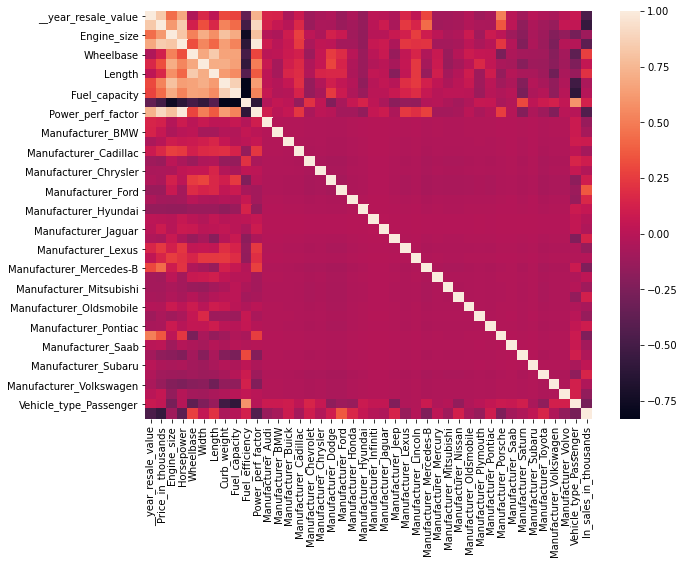

In [97]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

#### What relationships do you notice?

In [98]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands'] )
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', '__year_resale_value'],
      dtype='o

In [99]:
import numpy

In [100]:
numpy.random.seed(4)
numpy.random.randint(2,10,size=(1,20))

array([[4, 8, 9, 7, 3, 2, 9, 2, 4, 3, 4, 6, 9, 7, 8, 9, 9, 3, 2, 6]])

In [101]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( car_sales_new[feature_columns],
                                                  car_sales_new['ln_sales_in_thousands'],
                                                  test_size = 0.3,
                                                  random_state = 675 )

In [102]:
train_y

80     3.773703
145    2.375928
17     2.500206
142    3.262165
132    2.248340
         ...   
3      2.260512
156    2.994181
36     1.746413
9      2.919229
2      2.715621
Name: ln_sales_in_thousands, Length: 109, dtype: float64

In [103]:
print(len( train_X ))
print(len( test_X))

109
48


## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

## Building a linear regression model

## Method-1

In [104]:
import statsmodels.api as sm

In [106]:
train_X = sm.add_constant(train_X)
lm = sm.OLS(train_y,train_X).fit()

In [107]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.787
Model:                               OLS   Adj. R-squared:                  0.661
Method:                    Least Squares   F-statistic:                     6.264
Date:                   Thu, 13 May 2021   Prob (F-statistic):           2.29e-11
Time:                           15:38:12   Log-Likelihood:                -89.000
No. Observations:                    109   AIC:                             260.0
Df Residuals:                         68   BIC:                             370.3
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [113]:
lm.pvalues

const                      0.046982
Curb_weight                0.257174
Engine_size                0.053116
Fuel_capacity              0.024922
Fuel_efficiency            0.099200
Horsepower                 0.755282
Length                     0.941808
Manufacturer_Audi          0.674606
Manufacturer_BMW           0.488964
Manufacturer_Buick         0.272493
Manufacturer_Cadillac      0.414247
Manufacturer_Chevrolet     0.296655
Manufacturer_Chrysler      0.658850
Manufacturer_Dodge         0.170690
Manufacturer_Ford          0.004276
Manufacturer_Honda         0.053664
Manufacturer_Hyundai       0.277425
Manufacturer_Infiniti      0.325900
Manufacturer_Jaguar        0.610238
Manufacturer_Jeep          0.017011
Manufacturer_Lexus         0.140750
Manufacturer_Lincoln       0.356393
Manufacturer_Mercedes-B    0.233066
Manufacturer_Mercury       0.649362
Manufacturer_Mitsubishi    0.532490
Manufacturer_Nissan        0.052875
Manufacturer_Oldsmobile    0.673362
Manufacturer_Plymouth      0

In [112]:
lm.params

const                     -6.315423e+00
Curb_weight                4.340020e-01
Engine_size                4.848653e-01
Fuel_capacity             -1.078101e-01
Fuel_efficiency            9.263092e-02
Horsepower                -6.646464e-03
Length                    -1.296842e-03
Manufacturer_Audi          4.199951e-01
Manufacturer_BMW           5.743885e-01
Manufacturer_Buick         8.826155e-01
Manufacturer_Cadillac      6.415554e-01
Manufacturer_Chevrolet     8.277797e-01
Manufacturer_Chrysler      3.369112e-01
Manufacturer_Dodge         1.031935e+00
Manufacturer_Ford          2.309811e+00
Manufacturer_Honda         1.584399e+00
Manufacturer_Hyundai       8.973850e-01
Manufacturer_Infiniti      9.689249e-01
Manufacturer_Jaguar       -3.117414e-16
Manufacturer_Jeep          2.380383e+00
Manufacturer_Lexus         1.105680e+00
Manufacturer_Lincoln       8.191246e-01
Manufacturer_Mercedes-B    8.881368e-01
Manufacturer_Mercury       3.575989e-01
Manufacturer_Mitsubishi    4.887771e-01


In [119]:
# pvalue of ttest
for i,j in dict(lm.pvalues.sort_values(ascending=False)).items():
    if j>0.5:
        car_sales_num.drop(i)
        break
        

KeyError: "['Width'] not found in axis"

In [121]:
np.abs(lm.params).sort_values()

Manufacturer_Jaguar        3.117414e-16
Length                     1.296842e-03
Width                      2.560029e-03
Power_perf_factor          5.744042e-03
Horsepower                 6.646464e-03
__year_resale_value        1.262569e-02
Price_in_thousands         6.064030e-02
Wheelbase                  7.432742e-02
Fuel_efficiency            9.263092e-02
Fuel_capacity              1.078101e-01
Vehicle_type_Passenger     1.347108e-01
Manufacturer_Volkswagen    3.179484e-01
Manufacturer_Oldsmobile    3.206075e-01
Manufacturer_Chrysler      3.369112e-01
Manufacturer_Saturn        3.514270e-01
Manufacturer_Mercury       3.575989e-01
Manufacturer_Audi          4.199951e-01
Curb_weight                4.340020e-01
Engine_size                4.848653e-01
Manufacturer_Mitsubishi    4.887771e-01
Manufacturer_BMW           5.743885e-01
Manufacturer_Cadillac      6.415554e-01
Manufacturer_Plymouth      7.649309e-01
Manufacturer_Lincoln       8.191246e-01
Manufacturer_Chevrolet     8.277797e-01


In [122]:
print('Parameters:\n ', lm.params)
print('R2: ', lm.rsquared)

Parameters:
  const                     -6.315423e+00
Curb_weight                4.340020e-01
Engine_size                4.848653e-01
Fuel_capacity             -1.078101e-01
Fuel_efficiency            9.263092e-02
Horsepower                -6.646464e-03
Length                    -1.296842e-03
Manufacturer_Audi          4.199951e-01
Manufacturer_BMW           5.743885e-01
Manufacturer_Buick         8.826155e-01
Manufacturer_Cadillac      6.415554e-01
Manufacturer_Chevrolet     8.277797e-01
Manufacturer_Chrysler      3.369112e-01
Manufacturer_Dodge         1.031935e+00
Manufacturer_Ford          2.309811e+00
Manufacturer_Honda         1.584399e+00
Manufacturer_Hyundai       8.973850e-01
Manufacturer_Infiniti      9.689249e-01
Manufacturer_Jaguar       -3.117414e-16
Manufacturer_Jeep          2.380383e+00
Manufacturer_Lexus         1.105680e+00
Manufacturer_Lincoln       8.191246e-01
Manufacturer_Mercedes-B    8.881368e-01
Manufacturer_Mercury       3.575989e-01
Manufacturer_Mitsubishi   

In [123]:
#Error on training data
train_X = sm.add_constant(train_X)
y_pred_train = lm.predict(train_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train_y, y_pred_train))
print('MSE:', metrics.mean_squared_error(train_y, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, y_pred_train)))

MAE: 0.4271148230528329
MSE: 0.29973711727331837
RMSE: 0.5474825269114242


In [124]:
#Error on testing data
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.7594544800790825
MSE: 0.8597978895371495
RMSE: 0.9272528724879473


## Method-2

In [125]:
from sklearn.model_selection import train_test_split
train ,test = train_test_split(car_sales_new,test_size=0.3,random_state = 123 ) 

In [126]:
train.head(5)

__year_resale_value  Price_in_thousands  Engine_size  Horsepower  \
45             12.025000              19.565          2.4       150.0   
129             9.200000              10.685          1.9       100.0   
79              8.325000              13.987          1.8       113.0   
153            18.020008              27.500          2.4       168.0   
35              7.750000              12.640          2.0       132.0   

     Wheelbase  Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency  \
45       113.3   76.8   186.3        3.533           20.0             24.0   
129      102.4   66.4   176.9        2.332           12.1             33.0   
79        98.4   66.5   173.6        2.250           13.2             30.0   
153      104.9   69.3   185.9        3.208           17.9             25.0   
35       105.0   74.4   174.4        2.567           12.5             29.0   

     ...  Manufacturer_Pontiac  Manufacturer_Porsche  Manufacturer_Saab  \
45   ...                     0                     0                  0   
129  ...                     0                     0                  0   
79   ...                     0                     0                  0   
153  ...                     0                     0                  0   
35   ...                     0                     0                  0   

     Manufacturer_Saturn  Manufacturer_Subaru  Manufacturer_Toyota  \
45                     0                    0                    0   
129                    1                    0                    0   
79                     0                    0                    0   
153                    0                    0                    0   
35                     0                    0                    0   

     Manufacturer_Volkswagen  Manufacturer_Volvo  Vehicle_type_Passenger  \
45                         0                   0                       0   
129                        0                   0                       1   
79                         0                   0                       1   
153                        0                   1                       1   
35                         0                   0                       1   

     ln_sales_in_thousands  
45                5.208114  
129               4.402074  
79                3.304393  
153               2.787785  
35                4.344247  

[5 rows x 42 columns]

In [127]:
train.columns

Index(['__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sale

In [128]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sales

In [129]:
test.columns= [phrase.strip().replace('-', '') for phrase in test.columns]
test.columns

Index(['__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_MercedesB',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'ln_sales

In [130]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands','Manufacturer_Jaguar','Length'
,'Width'  
,'Power_perf_factor' ,'Horsepower','Manufacturer_Infiniti', 
'Manufacturer_Saab'  ] ))

#print(all_columns)

my_formula = "ln_sales_in_thousands~" + all_columns

print(my_formula)

ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_MercedesB+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+__year_resale_value


In [ ]:
# Advantage of formula.api is if you want to drop some of x var from the data then drop the x var from formula then formula.api will consider only those x var which will be present in formula.
import statsmodels.formula.api as smf

lm=smf.ols(formula=my_formula, data=train).fit()
#lm=smf.ols('ln_sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [ ]:
lm.summary()

## Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> R-squared = Explained variation / Total variation <br>
> Total variation is variation of response variable around it's mean. <br>
> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
> while 100% signifies that the model explains all the variability of the response. <br>
> The closer the r-square to 100%, the better is the model. <br>

## Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
np.abs(lm.params).sort_values()

In [ ]:
y_pred = lm.predict(train.drop('ln_sales_in_thousands',axis=1))
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(train['ln_sales_in_thousands'], y_pred))
print('MSE:', metrics.mean_squared_error(train['ln_sales_in_thousands'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train['ln_sales_in_thousands'], y_pred)))

In [ ]:
y_pred = lm.predict(test.drop('ln_sales_in_thousands',axis=1))
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test['ln_sales_in_thousands'], y_pred))
print('MSE:', metrics.mean_squared_error(test['ln_sales_in_thousands'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test['ln_sales_in_thousands'], y_pred)))

In [ ]:
import statsmodels as sm

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [ ]:
#%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_sales_in_thousands~Price_in_thousands+__year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', car_sales_new, return_type='dataframe')
#X=car_sales_num.drop('Sales_in_thousands',axis=1)

In [ ]:
X.shape[1]

In [ ]:
(X.values).shape

In [ ]:
variance_inflation_factor(X.values, 1)

In [ ]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif.round(1)

In [ ]:
X.head(5)

In [ ]:
lm1=smf.ols('ln_sales_in_thousands~Price_in_thousands+Engine_size+Vehicle_type_Passenger', car_sales_new).fit()

In [ ]:
lm1.summary()

In [ ]:
y_pred = lm1.predict(test_X)

In [ ]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test_y, y_pred)
print 'MSE:', metrics.mean_squared_error(test_y, y_pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred))

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [ ]:
sns.distplot(lm1.resid)

In [ ]:

sns.jointplot(car_sales_new.ln_sales_in_thousands, lm1.predict(car_sales_new) )

### USING sklearn Library to build the model
> sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [ ]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [ ]:
linreg = LinearRegression()
linreg.fit( train_X, train_y )

In [ ]:
train_X.columns

In [ ]:
linreg.coef_

In [ ]:
pd.concat([pd.Series(linreg.coef_),pd.Series(train_X.columns)],axis=1)

In [ ]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print ("RMSE:",rmse_t)
print( "R-Square:",metrics.r2_score( train_y, y_pred_t ))

In [ ]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print("RMSE:",rmse)
#print(metrics.r2_score( test_y, y_pred ))

In [ ]:
# Residual
residuals = train_y - y_pred_t

In [ ]:
# Scatter b/w train_y and residual
sns.jointplot(  train_y, residuals )

In [ ]:
# Histogram of residual
sns.distplot( residuals )

In [ ]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [ ]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score

In [ ]:
linrg = LinearRegression()

In [ ]:
error10=cross_val_score( linrg, car_sales_new.drop('ln_sales_in_thousands',axis=1), car_sales_new['ln_sales_in_thousands'], scoring = 'r2', cv = 10 )

In [ ]:
round( np.mean( error10), 2 )

In [ ]:
np.std( error10 )

In [ ]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [ ]:
F_values, p_values  = f_regression(  train_x, train_y )

In [ ]:
F_values

In [ ]:
['%.3f' % p for p in p_values]

As p - values are less than 5% - the variables are siginificant in the regression equation.

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions